In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
root_dir = '/content/drive/MyDrive/Colab Notebooks/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img'

In [7]:
image_data_generator = ImageDataGenerator(
    rescale = 1.0/255.0
)

data_generator = image_data_generator.flow_from_directory(
    root_dir,
    target_size = (64,64),
    batch_size = 500,
    shuffle = True,
    class_mode = 'categorical'
)

Found 9144 images belonging to 102 classes.


In [8]:
x_train,y_train = data_generator[0]
x_test,y_test = data_generator[1]

In [9]:
summary_weight = '/content/drive/MyDrive/Colab Notebooks/LP-IV-datasets/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [16]:
basic_model = VGG16(weights=summary_weight,include_top = False, input_shape=(64,64,3))

In [17]:
for layer in basic_model.layers:
  layer.trainable = False

In [20]:
x = Flatten()(basic_model.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(102,activation = 'softmax')(x)

In [23]:
model = Model(inputs = basic_model.input, outputs = x)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=1,validation_data = (x_test,y_test))

16/16 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.0736 - loss: 4.5501 - val_accuracy: 0.2340 - val_loss: 3.9815


In [24]:
import matplotlib.pyplot as plt

In [25]:
predicted_value = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step


In [26]:
labels = list(data_generator.class_indices.keys())

In [29]:
import numpy as np

Preditcted:  airplanes
Actual:  airplanes


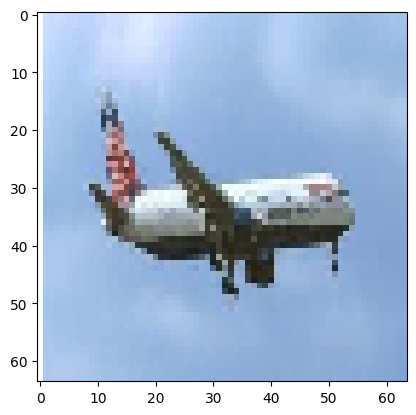

In [34]:
n = 24

plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])
